# BFS和DFS原理
* BFS為「廣度優先搜尋法」：
    * 為一種graph的搜尋演算法
    * 利用queue來處理，通常以迴圈的方式呈現
    * 會先拜訪vertex相鄰的點，再接續拜訪下一層，可解決最短路徑問題
    * 屬於盲目搜索(Unformed search)

* DFS為「深度優先搜尋法」：
    * 可應用在「樹」或「圖」
    * 利用stack來處理
    * 沿著節點一路找下去
    * 可產生目標圖的相應拓樸排序表，可解決最大路徑問題
    
# BFS和DFS比較
* 相同：
    * 都是利用節點和子節點之間的關係來做查找
    * 得到的解不一定是最佳解，需視問題情況

* 相異：
    * BFS利用queue，DFS利用stack
    * BFS所需的儲存空間較DFS大
    * BFS為不可回溯，DFS可回溯

* 小結：
    * BFS佔記憶體較多空間，不過執行速度較快，若是考量執行速度，BFS較適合
    * DFS較不佔記憶體空間，不過執行速度較慢，若是考慮儲存空間，DFS較適合

# 流程圖
## BFS

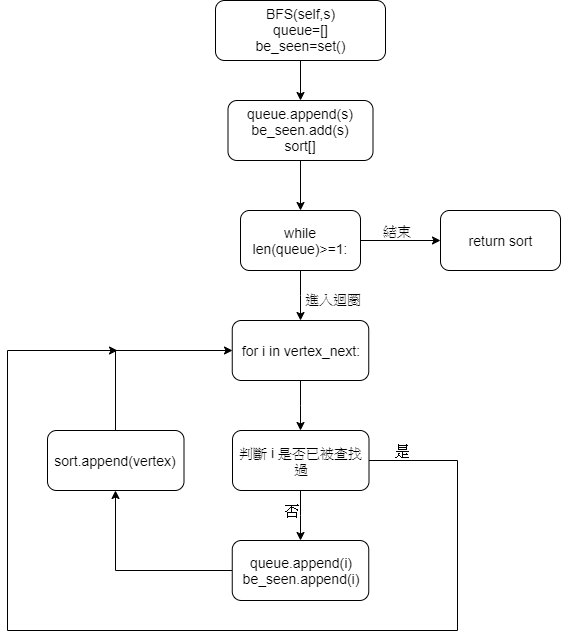

In [1]:
from IPython.display import Image
Image(filename="C:/Users/USER/Desktop/BFS.png")

# 流程圖
## DFS

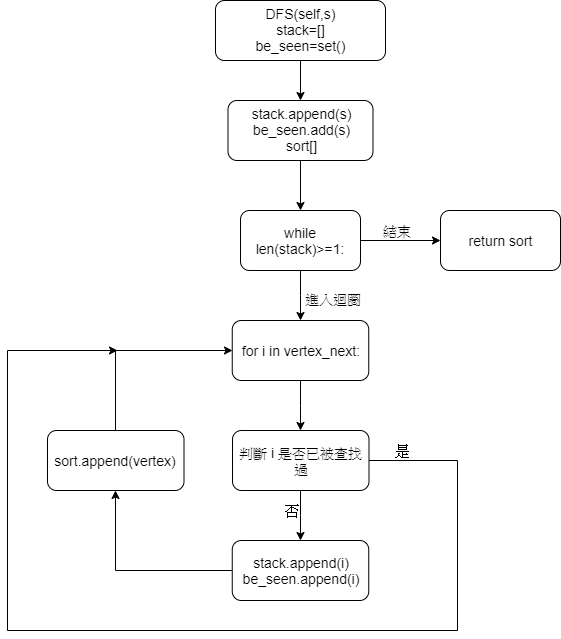

In [2]:
from IPython.display import Image
Image(filename="C:/Users/USER/Desktop/DFS.png")

# 學習歷程
* 起初看了老師的講解，我想說既然有用到前面的queue和stack觀念，那應該不會太難吧，再上網看了幾篇文章，就開始打了
* 首先，我從BFS開始，它的搜尋規則是「先搜尋完一層再接著一層」，所以我想說先用迴圈，不過還要先給定一個list，裡面放有搜尋過的值，這樣才會避免重複搜尋，那queue的部分就比較單純，因為可以直接append進去，取出來的時候也可以直接pop出來
* 不過一開始，我還真的不知道怎麼下手，因為我不知道，`self.graph`是啥？它是我的圖的意思嗎？所以又花了點時間去搞懂graph的功能，比較有趣的是`graph[vertex]`表示是跟vertex連結的節點，我想說graph真方便，連這種功能都有，感覺少了很多事要做呢哈哈，真是謝謝大神，那我就先開始弄了：

In [6]:
from collections import defaultdict  
class Graph:
    def __init__(self): 
        self.graph = defaultdict(list) 

    def addEdge(self,u,v): 
        self.graph[u].append(v)
  
    def BFS1(self, s): 
        queue=[]
        queue.append(s)
        be_seen=[]  #將還沒被讀到的值放進set
        be_seen.append(s)
        sort=[]
        while len(queue)>=1:
            vertex=queue.pop(0)
            vertex_next=self.graph[vertex]  #vertex所連接的點
            for i in vertex_next:
                if i not in be_seen:
                    queue.append(i)
                    be_seen.append(i)
            sort.append(vertex)
        return sort

* 上半部都沒有動到，直接從BFS這部分開始打，看起來應該還算可以，那就跑看看助教給的測資吧

In [7]:
g=Graph()
g.addEdge(0,1)
g.addEdge(0,2)
g.addEdge(1,2)
g.addEdge(2,0)
g.addEdge(2,3)
g.addEdge(3,3)

In [8]:
print(g.BFS1(2))

[2, 0, 3, 1]


* 哇！竟然跑出來了，原本是想說應該沒那麼容易，看來開始打程式之前，多看一些文章果然有差，想說既然BFS已經弄差不多了，那它的兄弟DFS應該也是差不多吧，於是就繼續開始打DFS，
* DFS的搜尋方法是「一個節點沿著一個搜尋下去」，當沒有下一個節點或是已經重複了，就再退回來一格，繼續找下去，重複上述動作直到都搜尋到，概念大概是這樣，雖然老師已經提示可以用stack來做，但一開始我只能在腦裡想像它的模樣，還不知道怎麼用程式碼呈現，或許這就是老師說的「差異」，很多人應該跟我一樣用「想的」都沒問題，但真正要run出來可沒那麼容易
* 所以再格個一天，我才開始弄，我一直再想既然是queue跟stack的差異，那不就是「取第一個跟取最後一個的差異嗎？」喔喔喔喔，瞬間覺得茅塞頓開，我之前好像把DFS想得太複雜了，應該只需要從BFS那邊小改一下就可以了，所以我就開始弄了

In [ ]:
def DFS1(self, s):
    stack=[]
    stack.append(s)
    seen=set()
    seen.add(s)
    sort=[]
    while len(stack)>=1:
        vertex=stack.pop()
        vertex_next=self.graph[vertex]
        for i in vertex_next:
            if i not in seen:
                stack.append(i)
                seen.add(i)
        sort.append(vertex)
    return sort

* 其實只是把一些變數名稱改一改，然後把原本的`pop(0)`改成`pop()`，因為stack是「後進先出」，所以要pop最後一個值，這部分注意到應該就沒問題了吧，完整的Graph長這樣：

In [15]:
from collections import defaultdict  
class Graph:
    def __init__(self): 
        self.graph = defaultdict(list) 

    def addEdge(self,u,v): 
        self.graph[u].append(v)
  
    def BFS1(self, s): 
        queue=[]
        queue.append(s)
        be_seen=set()  #將還沒被讀到的值放進set
        be_seen.add(s)
        sort=[]
        while len(queue)>=1:
            vertex=queue.pop(0)
            vertex_next=self.graph[vertex]  #vertex所連接的點
            for i in vertex_next:
                if i not in be_seen:
                    queue.append(i)
                    be_seen.add(i)
            sort.append(vertex)
        return sort
    
    def DFS1(self, s):
        stack=[]
        stack.append(s)
        seen=set()
        seen.add(s)
        sort=[]
        while len(stack)>=1:
            vertex=stack.pop()
            vertex_next=self.graph[vertex]
            for i in vertex_next:
                if i not in seen:
                    stack.append(i)
                    seen.add(i)
            sort.append(vertex)
        return sort

* 一樣跑看看測資吧！

In [16]:
g=Graph()
g.addEdge(0,1)
g.addEdge(0,2)
g.addEdge(1,2)
g.addEdge(2,0)
g.addEdge(2,3)
g.addEdge(3,3)

In [12]:
print(g.DFS1(2))

[2, 3, 0, 1]


* 唉呦，跑出來的結果好像跟助教示範的一樣喔，那我兩個一起跑試看看吧(雖然應該是不影響)

In [17]:
print(g.BFS1(2))
print(g.DFS1(2))

[2, 0, 3, 1]
[2, 3, 0, 1]


* 果真沒差哈哈，那我加強測值難度好了

In [20]:
g=Graph()
g.addEdge(0,1)
g.addEdge(0,2)
g.addEdge(1,2)
g.addEdge(2,0)
g.addEdge(2,3)
g.addEdge(3,3)
g.addEdge(0,4)
g.addEdge(1,4)
g.addEdge(1,5)
g.addEdge(3,6)

* 開始測之前，我預計的BFS結果是[2,0,3,1,4,6,5]，DFS的結果是[2,3,6,0,4,1,5]，大概是長這樣：

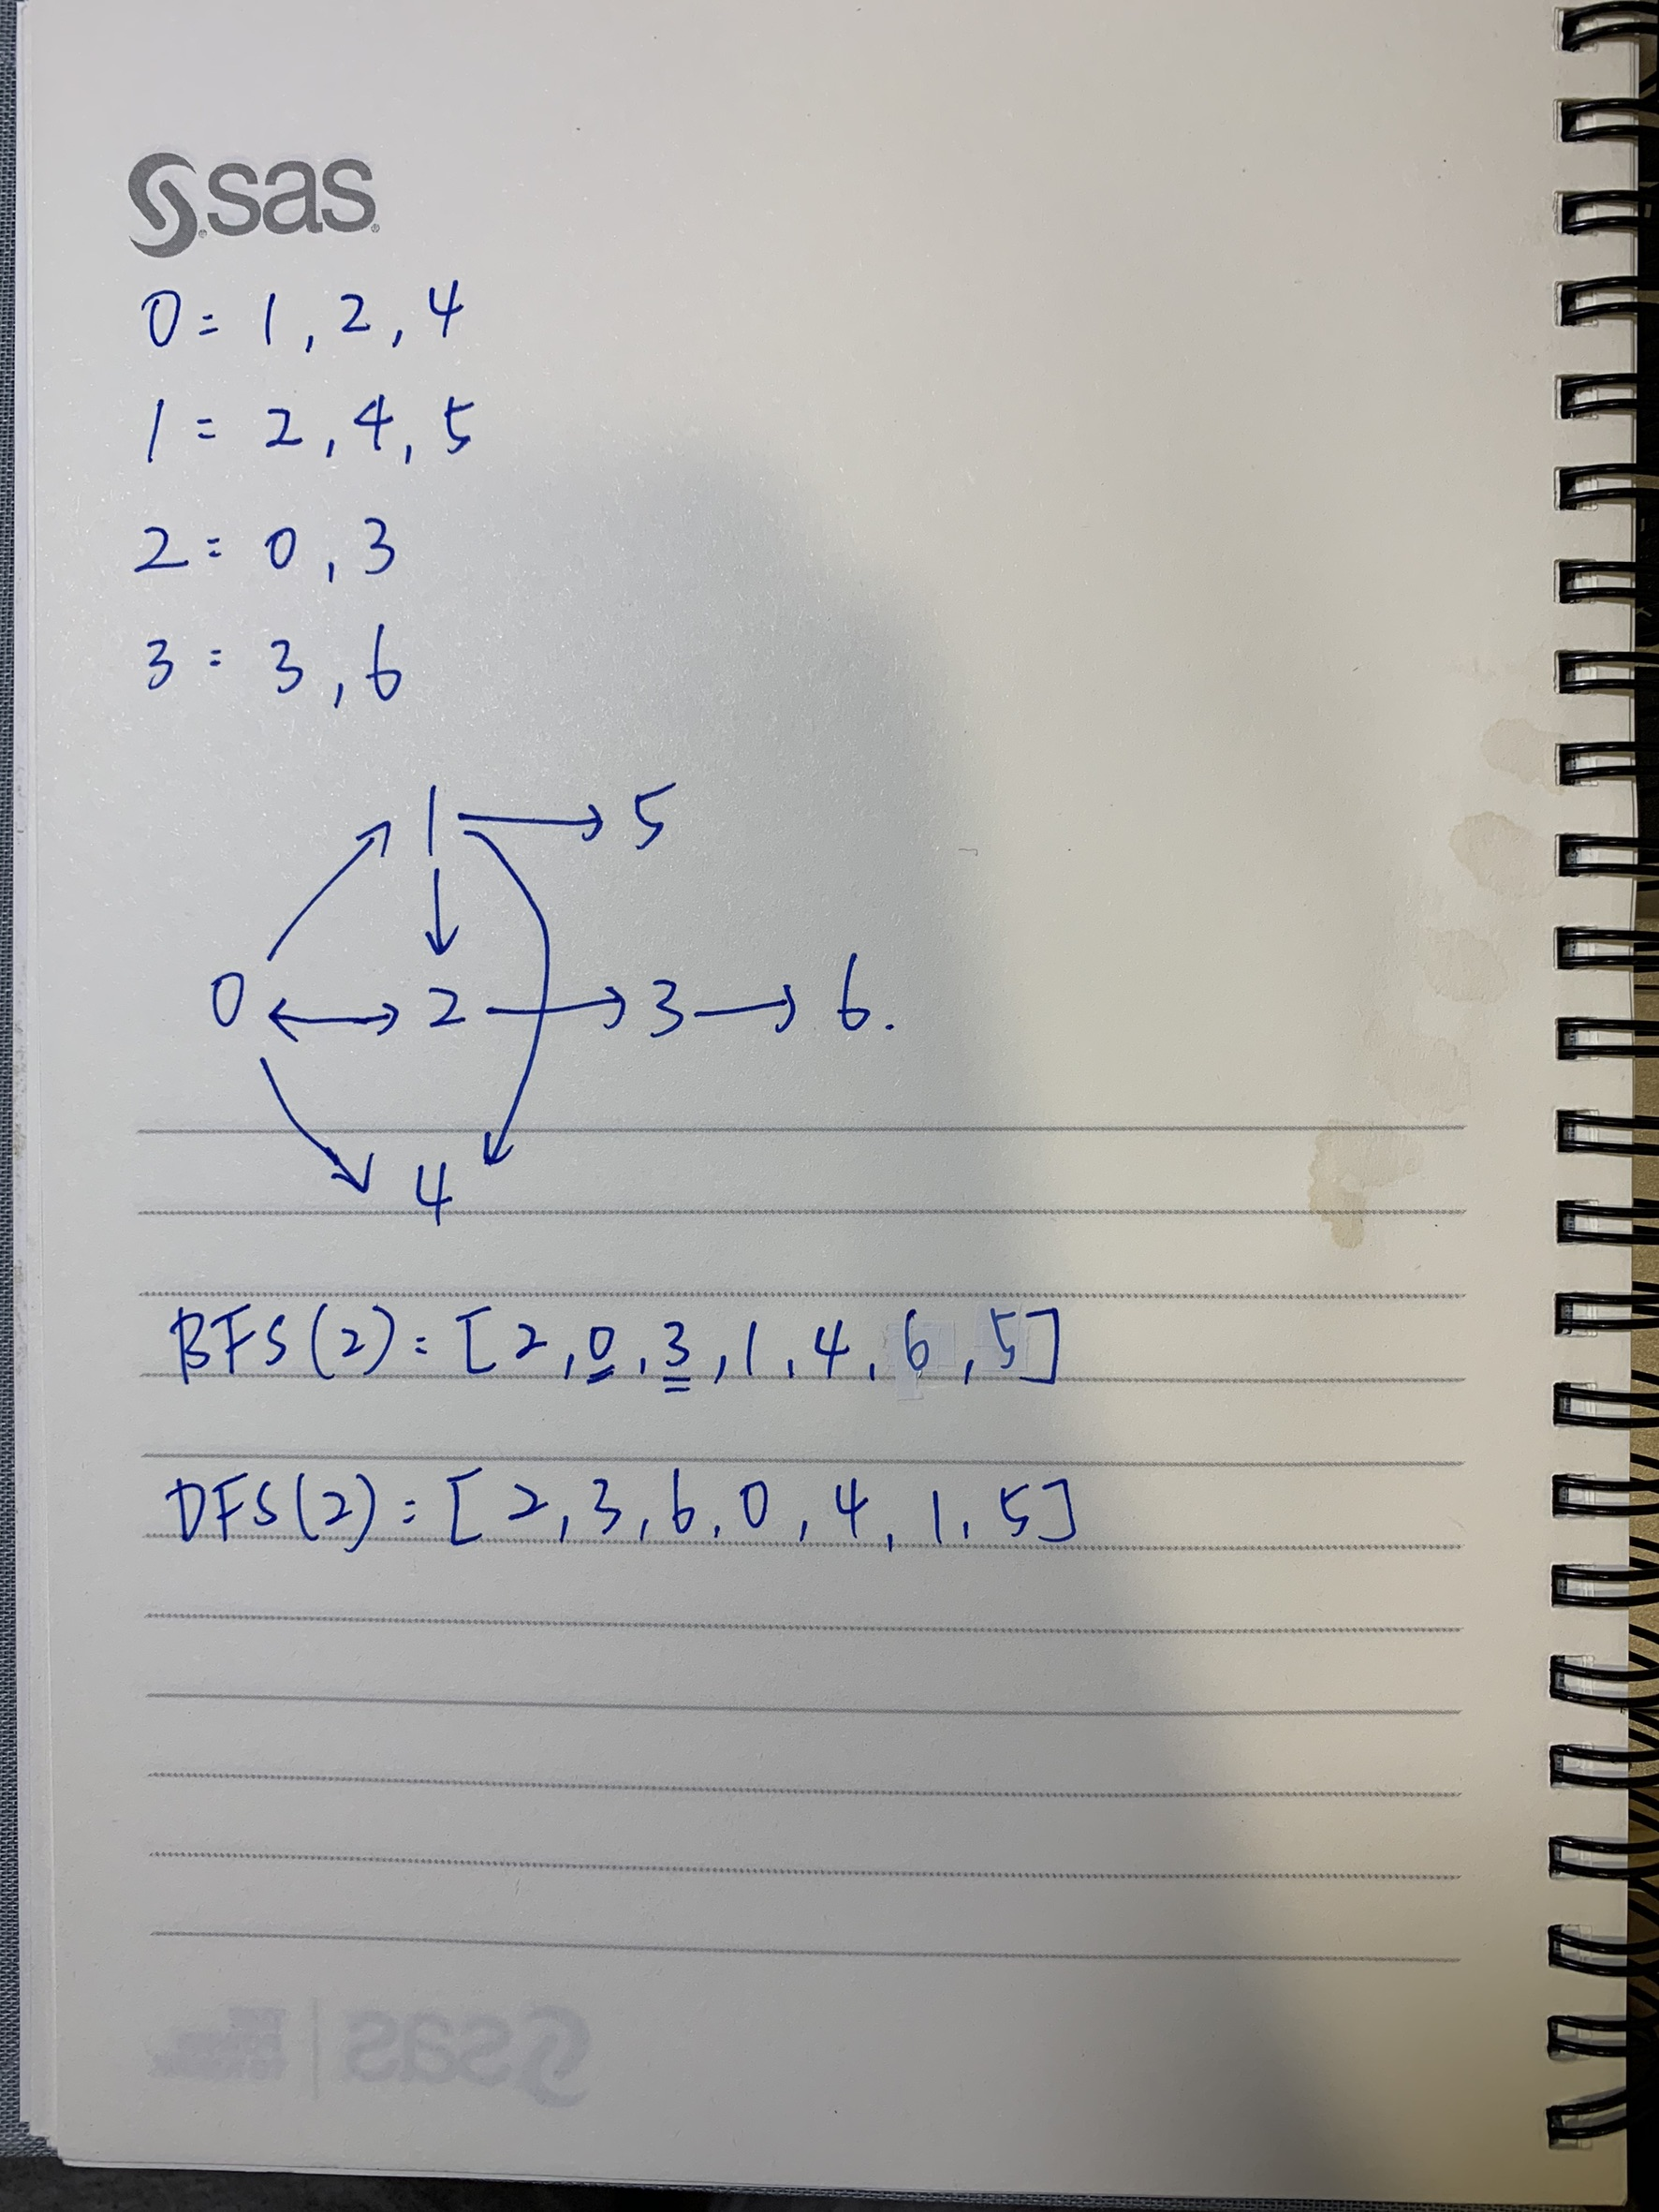

In [3]:
from IPython.display import Image
Image(filename="C:/Users/USER/Desktop/bfsdfs.jpg")

In [22]:
print(g.BFS1(2))
print(g.DFS1(2))

[2, 0, 3, 1, 4, 6, 5]
[2, 3, 6, 0, 4, 1, 5]


* 水喔，應當是沒有問題了！爽！

# 參考資料
* [廣度優先搜尋法](http://simonsays-tw.com/web/DFS-BFS/BreadthFirstSearch.html)
* [Graph: Depth-First Search(DFS，深度優先搜尋)](https://alrightchiu.github.io/SecondRound/graph-depth-first-searchdfsshen-du-you-xian-sou-xun.html)
* [廣度優先搜尋法（Breadth-First Search）](https://seanlhlee.gitbooks.io/acosa/gitBook/Data%20Structures/Graphs/breadth-first_search.html)
* [廣度優先搜尋](https://zh.wikipedia.org/wiki/%E6%B7%B1%E5%BA%A6%E4%BC%98%E5%85%88%E6%90%9C%E7%B4%A2)
* [深度優先搜尋(DFS)和廣度優先搜尋(BFS)演算法，實用的節點搜尋法](https://magiclen.org/dfs-bfs/)
* [深度優先搜尋和廣度優先搜尋的比較](https://www.itread01.com/content/1543634648.html)